<h1>Gucci and Roulette-net</h1>
<p>A classifier for my cats!</p>
    
<p>Data was downloaded from my personal Google Photos account.</p>
    
<p>Update: Tried 30 or so images for each cat the 1st run, running it again with ~64!</p>

In [43]:
from fastai.vision import *

In [44]:
path = Path('data/gnr')
gucci_path = path/'gucci'
roulette_path = path/'roulette'

In [46]:
gucci_path.ls()[:5], len(gucci_path.ls())

([WindowsPath('data/gnr/gucci/00000IMG_00000_BURST20190411000708888_COVER.jpg'),
  WindowsPath('data/gnr/gucci/00000IMG_00000_BURST20190501181033375_COVER.jpg'),
  WindowsPath('data/gnr/gucci/00000IMG_00000_BURST20190520002011676_COVER.jpg'),
  WindowsPath('data/gnr/gucci/00000IMG_00000_BURST20190627142419258_COVER.jpg'),
  WindowsPath('data/gnr/gucci/00100dPORTRAIT_00100_BURST20190312165906836_COVER.jpg')],
 64)

In [48]:
roulette_path.ls()[:5], len(roulette_path.ls())

([WindowsPath('data/gnr/roulette/00000IMG_00000_BURST20190118100347199_COVER.jpg'),
  WindowsPath('data/gnr/roulette/00000IMG_00000_BURST20190131172546752_COVER.jpg'),
  WindowsPath('data/gnr/roulette/00000IMG_00000_BURST20190221204033487_COVER.jpg'),
  WindowsPath('data/gnr/roulette/00000IMG_00000_BURST20190228235047259_COVER.jpg'),
  WindowsPath('data/gnr/roulette/00000IMG_00000_BURST20190303222353727_COVER.jpg')],
 64)

In [9]:
doc(verify_images)

In [49]:
verify_images(gucci_path, delete=True, max_size=500)

In [50]:
verify_images(roulette_path, delete=True, max_size=500)

In [22]:
doc(ImageDataBunch.from_folder)

In [17]:
doc(get_transforms)

<h2>Viewing the Data</h2>

In [51]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4, bs=30).normalize(imagenet_stats)

In [52]:
data.classes

['gucci', 'roulette']

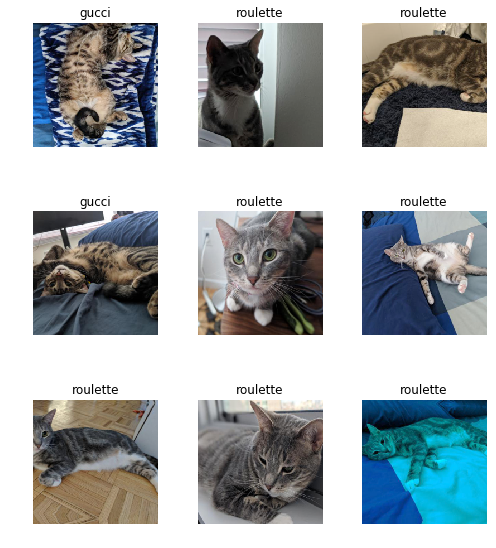

In [53]:
data.show_batch(rows=3, figsize=(7,8))

Awwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww

In [54]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gucci', 'roulette'], 2, 103, 25)

<h2>Training the Model</h2>

<h3>This is for the old model for ~32 images! use the next one (gnr-2)</h3>

In [35]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
doc(learn.fit_one_cycle)

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.741745,0.785675,0.500000,00:18
1,0.823941,1.185412,0.583333,00:16
2,0.708785,1.359647,0.583333,00:16
3,0.607090,1.423914,0.583333,00:16


Yikes! It seems that my cats look too similar, or I didnt use enough data. I will retrofit with double or triple the pictures later! Current error rates are 50-60% : (

In [39]:
learn.save('gnr-1')

In [40]:
learn.unfreeze()

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Judging from the image above, I need a greater learning rate since my amount of data is relatively low. Might cause some overfitting, I will just add more pictures soon!

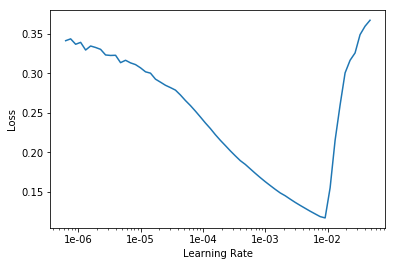

In [42]:
learn.recorder.plot()

Oof!

<h3> GNR-2 64 Images </h3>

In [62]:
learn64 = cnn_learner(data, models.resnet34, metrics=error_rate)

In [68]:
doc(learn64.fit_one_cycle)

In [56]:
learn64.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.884026,0.854804,0.520000,00:17
1,0.705488,0.875862,0.440000,00:17
2,0.540984,0.681857,0.280000,00:17
3,0.451519,0.568487,0.280000,00:17


Much better! Not perfect though

In [58]:
learn64.save('gnr-2')

In [59]:
learn64.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


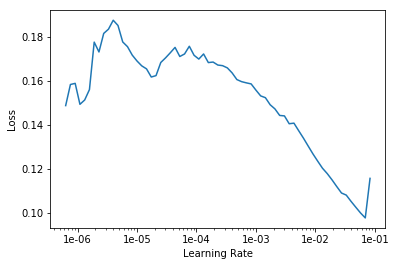

In [60]:
learn64.recorder.plot()

In [64]:
learn64.fit_one_cycle(4, max_lr=1e-015)

epoch,train_loss,valid_loss,error_rate,time
0,0.936699,0.641902,0.440000,00:17
1,0.953485,0.608595,0.320000,00:17
2,0.956122,0.574670,0.200000,00:17
3,0.952282,0.571730,0.240000,00:16


## Interpret

In [65]:
learn64.load('gnr-2')

Learner(data=ImageDataBunch;

Train: LabelList (103 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gucci,gucci,gucci,gucci,gucci
Path: data\gnr;

Valid: LabelList (25 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gucci,gucci,gucci,gucci,roulette
Path: data\gnr;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [66]:
interp = ClassificationInterpretation.from_learner(learn64)

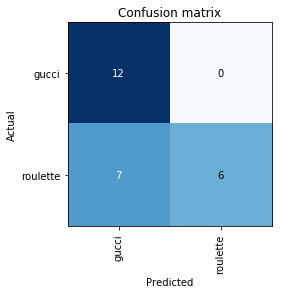

In [67]:
interp.plot_confusion_matrix()


Confused? So am I. 
I want to try this on another set of less-similar images.